# **Implementation of Using Bagging, Boosting, and Stacking in Python**

**Monitoring Ensemble Learning Models**
We use bagging to combine weak learners of high variance. Bagging aims to produce a model with lower variance than the individual weak models. These weak learners are homogenous, meaning they are of the same type.



**Bagging** is also known as Bootstrap aggregating. It consists of two steps: bootstrapping and aggregation.



**Bootstrapping**
Involves resampling subsets of data with replacement from an initial dataset. In other words, the initial dataset provides subsets of data. Creating these subsets, bootstrapped datasets or simply bootstraps, by resampling ‘with replacement,’ which means an individual data point can be sampled multiple times. Each bootstrap dataset trains a weak learner.



**Aggregating**
Individual weak learners train independently from each other. Each learner makes independent predictions. The system aggregates the results of those predictions to get the overall prediction. The predictions are aggregated using either max voting or averaging.



**Max Voting**
It is commonly used for classification problems to take the mode of the predictions (the most occurring prediction). It’s called voting because, like in election voting, the premise is that ‘the majority rules.’ Each model makes a prediction, and a prediction from each model counts as a single ‘vote.’ The most occurring ‘vote’ is chosen as the representative for the combined model.



**Averaging**
Using it generally for regression problems. It involves taking the average of the predictions. The resulting average is used as the overall prediction for the combined model.

# Steps of Bagging

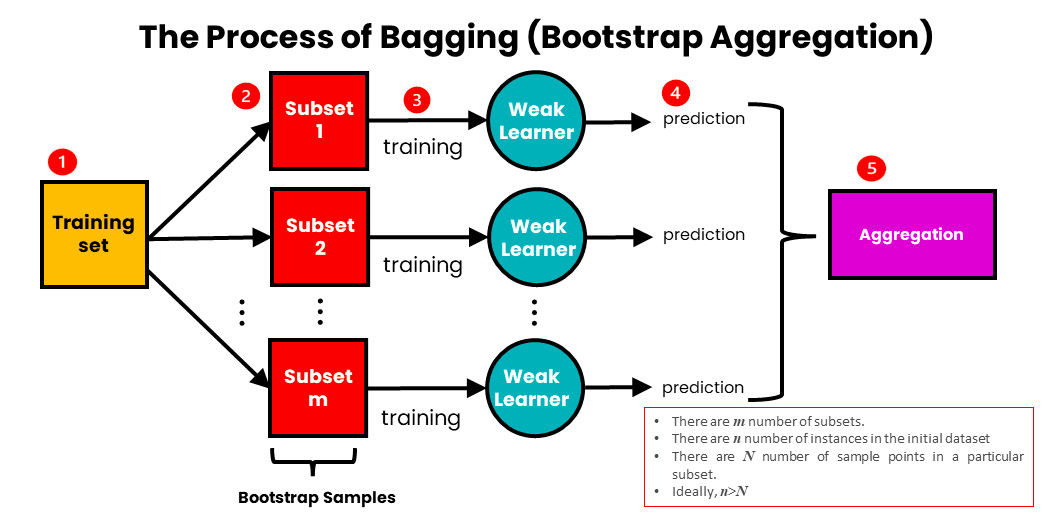

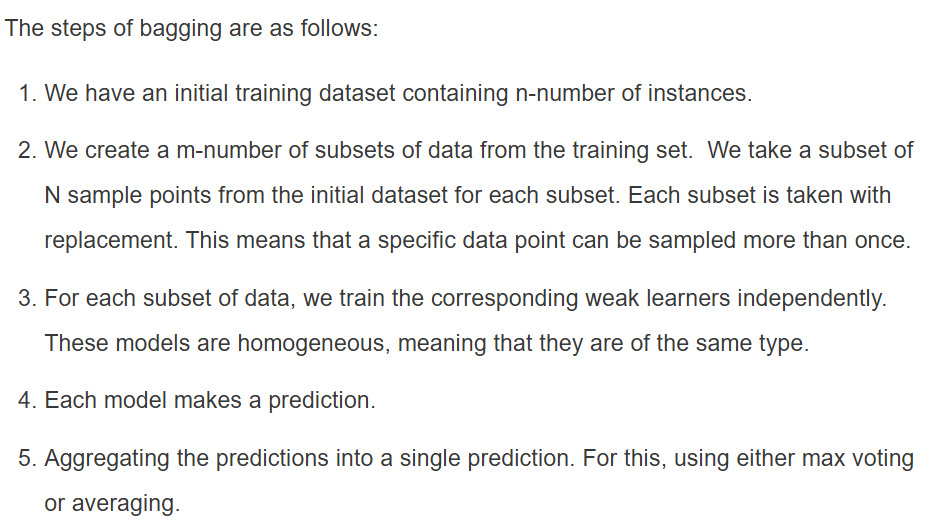

# 1. Bagging

In [1]:
# Import necessary libraries

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Load dataset

iris = load_iris()

X = iris.data

y = iris.target

# Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForest classifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

# Make predictions

y_pred = rf_clf.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

Random Forest Classifier Accuracy: 1.00


# 2. Boosting

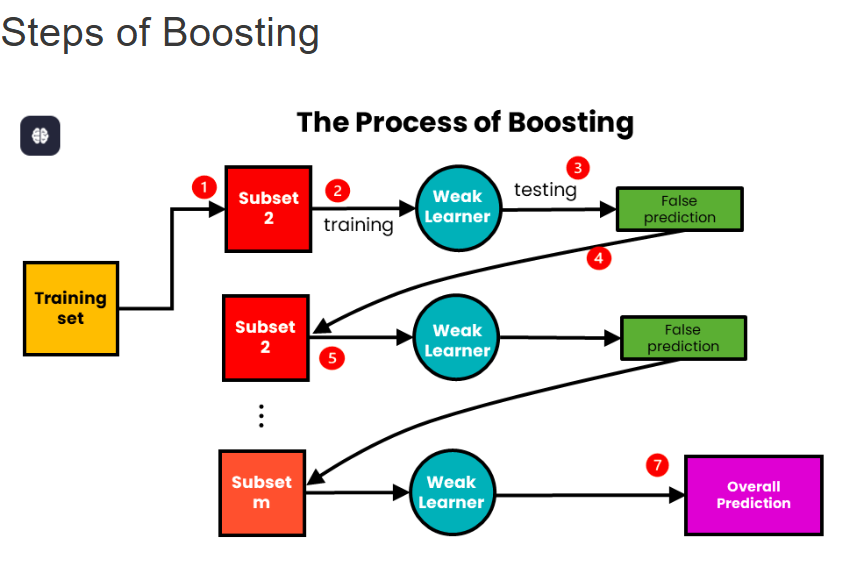

Boosting works with the following steps:



* We sample m-number of subsets from an initial training dataset.
Using the first subset, we train the first weak learner.
* We test the trained weak learner using the training data. As a result of the testing, some data points will be incorrectly predicted.
* Each data point with the wrong prediction is sent into the second subset of data, and this subset is updated.
* Using this updated subset, we train and test the second weak learner.
* We continue with the next subset until reaching the total number of subsets.
* We now have the total prediction. The overall prediction has already been aggregated at each step, so there is no need to calculate it.

In [2]:
# Import necessary libraries

import xgboost as xgb

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Load dataset

iris = load_iris()

X = iris.data

y = iris.target

# Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost classifier

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_clf.fit(X_train, y_train)

# Make predictions

y_pred = xgb_clf.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")

XGBoost Classifier Accuracy: 1.00


# 3. Stacking


We’ll use the Stacking Classifier from scikit-learn to implement stacking.

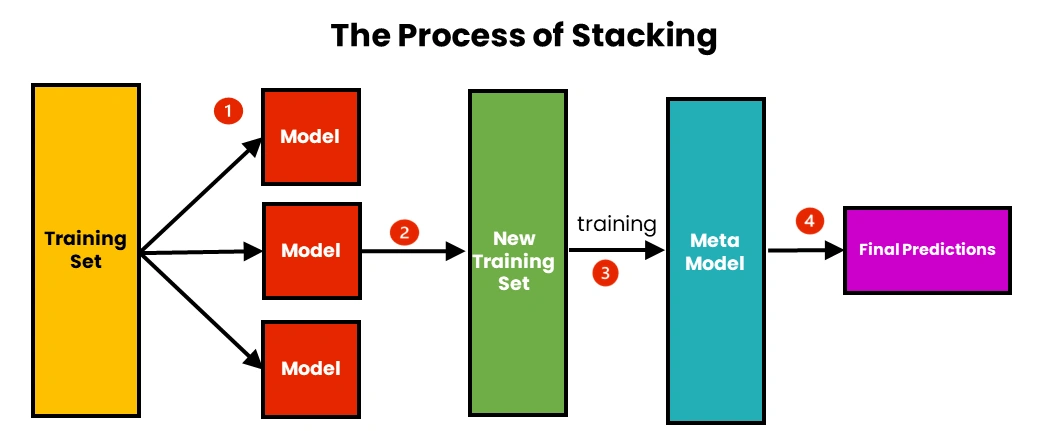

The steps of Stacking are as follows:



* We use initial training data to train m-number of algorithms.
* Using the output of each algorithm, we create a new training set.
* Using the new training set, we create a meta-model algorithm.
* Using the results of the meta-model, we make the final prediction. * * Combining the result using weighted averaging.

In [3]:
# Import necessary libraries

from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Load dataset

iris = load_iris()

X = iris.data

y = iris.target

# Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base models

base_models = [

('rf', RandomForestClassifier(n_estimators=100, random_state=42)),

('svm', SVC(probability=True, random_state=42))

]

# Define meta-model

meta_model = LogisticRegression()

# Initialize and train the StackingClassifier

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_clf.fit(X_train, y_train)

# Make predictions

y_pred = stacking_clf.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.2f}")

Stacking Classifier Accuracy: 1.00


# When to use Bagging vs Boosting vs Stacking?

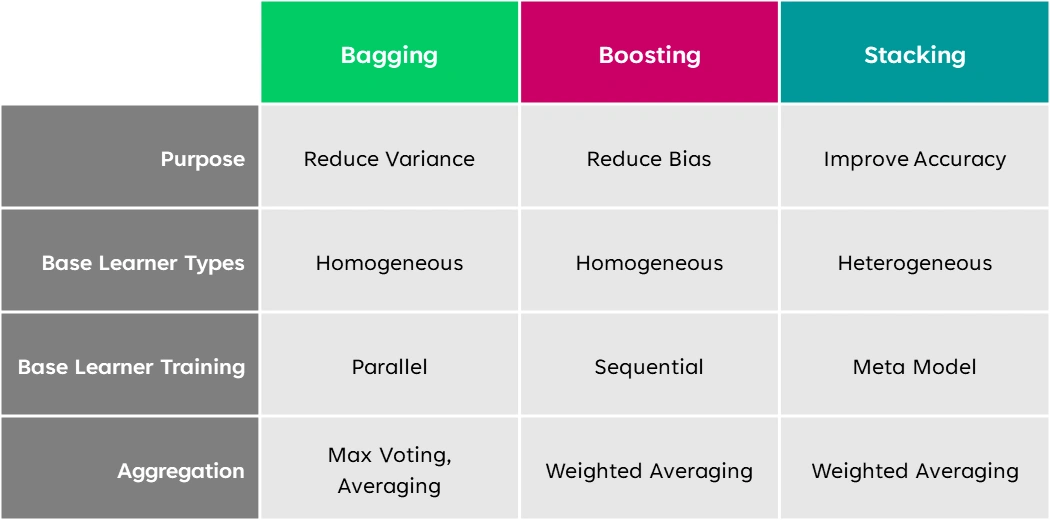

# Conclusion


In conclusion, understanding and effectively applying ensemble learning techniques like bagging, boosting, and stacking is crucial for enhancing the performance and robustness of machine learning models